In [1]:
import numpy as np 
import math 
from itertools import combinations
import matplotlib.pyplot as plt
from scipy.linalg import eigh, block_diag

### Site Occupation    
On this section we plot how the ground state and the highest energy eigenstate are distributed on different sites. We observe how the site occupation of these eigenstates vary with different onsite energies. We test with constant ($[0]*N$), peak ($[0,0,0,0,1,0,0,0,0]$), periodic ($[0,2,0,2,0...]$) and increasing ($[0,1,2,3,4,...]$) onsite energy. 

In [2]:
from hubbard_functions import hubb0_model, spinless_state_occupation, density_of_states, spinless_basis

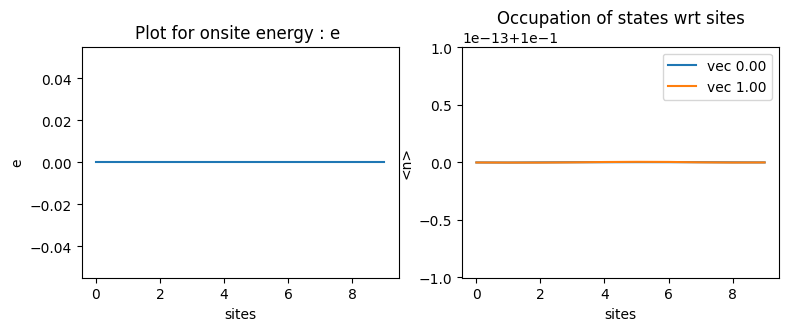

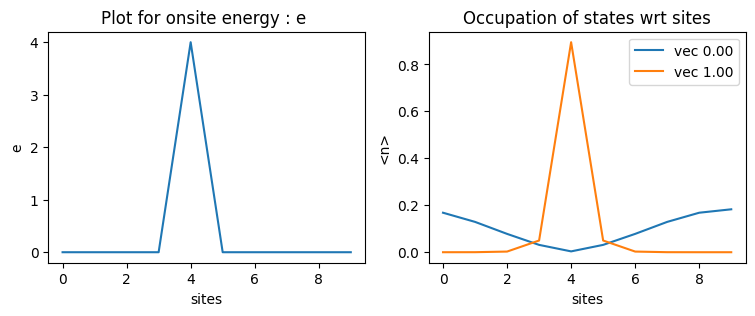

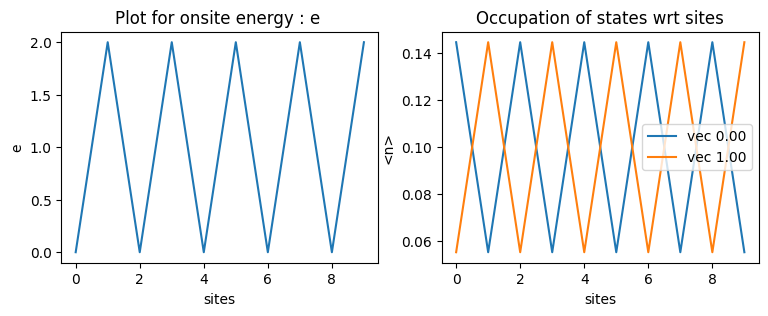

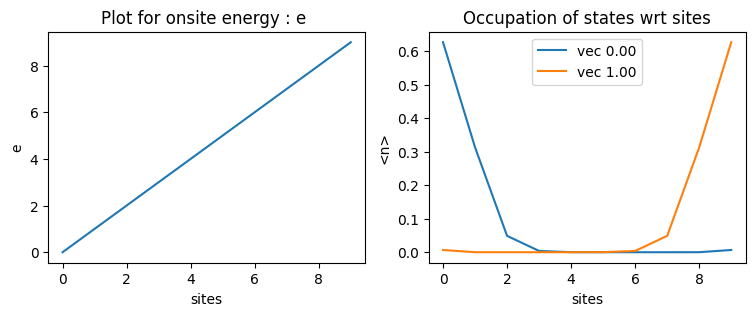

In [3]:
N= 10 
r=1
U=0
t =  1 

e_list = [[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,4,0,0,0,0,0],[0,2,0,2,0,2,0,2,0,2],
          list(range(N))]

for i,e in enumerate(e_list) : 
    eigstates = hubb0_model(N,r,e,t,U)[2]
    
    
    plt.figure(figsize=(9, 3))
    
    plt.subplot(1,2,1)
    plt.plot(range(N),e)
    plt.title('Plot for onsite energy : e ')
    plt.xlabel('sites')
    plt.ylabel('e')
    
    plt.subplot(1,2,2)
    spinless_state_occupation(N,r,[eigstates[0],eigstates[-1]])
    
    

We see that the ground state tends to occupy the sites where the onsite energy is lowest. Whereas the highest energy eigenstate refelcts the rare cases when the electron is in the site with high onsite energy. 

### 2. Density of States 

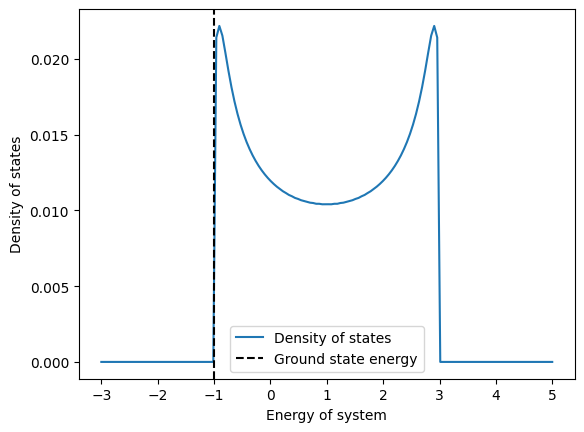

In [4]:
N=100
r=1
centers = 150 
gamma = 0.3 
t=1 
e= [1]*N
U=0
eigvals = hubb0_model(N,r,e,t,U)[1]
#print(eigvals)
density_of_states(eigvals,centers,gamma)

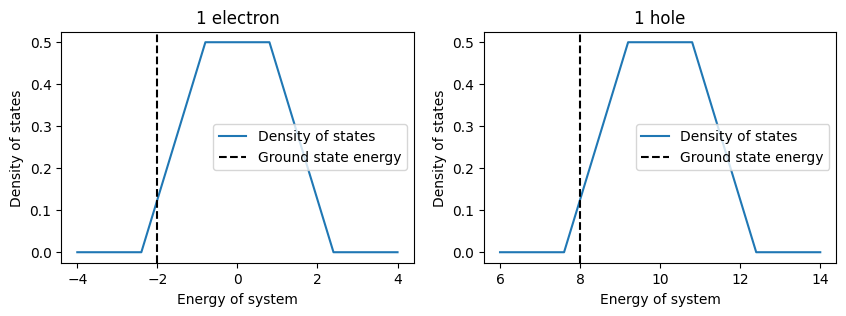

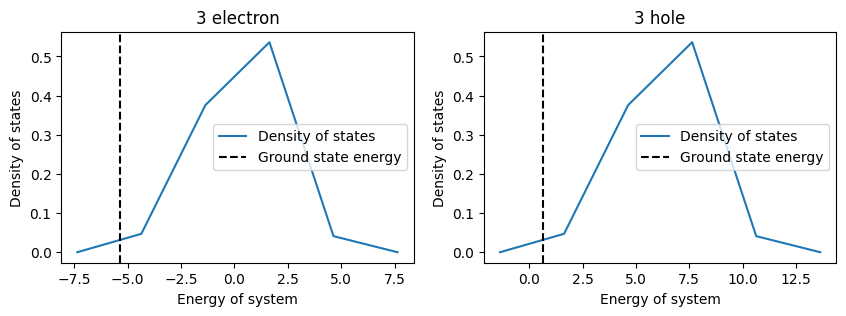

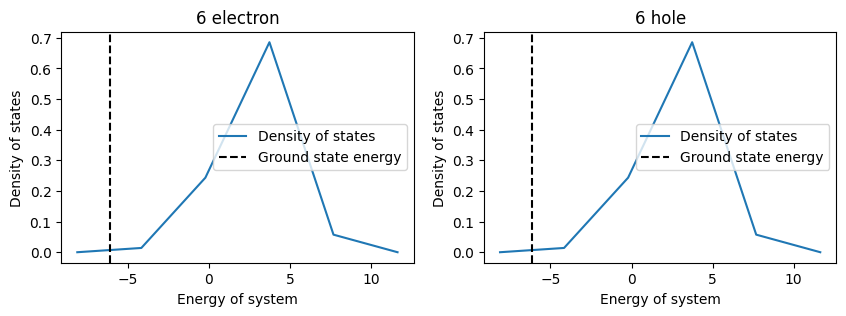

In [5]:
N=12
e = [0]*N
t = 1 
U = 1
centers = 6
gamma = 0.1
occ = [1,3,6]



for i,r in enumerate(occ) : 
    eigvals = hubb0_model(N,r,e,t,U)[1]
    eigvals_holes = hubb0_model(N,12-r,e,t,U)[1]
    
    plt.figure(figsize=(10, 3))
    
    plt.subplot(1,2,1)
    density_of_states(eigvals,centers,gamma)
    plt.title(f'{r} electron')
    
    plt.subplot(1,2,2)
    density_of_states(eigvals_holes,centers,gamma)
    plt.title(f'{r} hole')

## 3. <n_i n_i+1>

U=0 :  [0.003, 0.012, 0.003, 0.003, 0.028, 0.007]
U=4 :  [0.0, 0.003, 0.0, 0.0, 0.036, 0.002]
U=8 :  [0.0, 0.0, 0.0, 0.0, 0.017, 0.0]


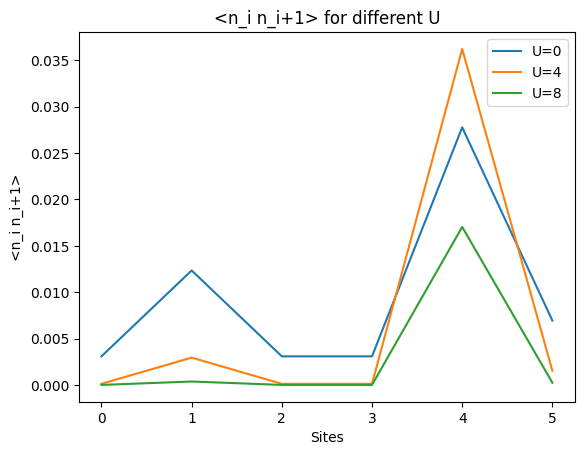

In [6]:
N=6
r= 3
e=[0]*N
t=1


plt.figure()

basis_set = spinless_basis(N,r)
for U in [0,4,8] : 
    gs = hubb0_model(N,r,e,t,U)[2][0]
    #print(gs)
    x = list(range(N))
    y = [0]*N
    for site in range(N) : 
        for b,basis in enumerate(basis_set) : 
            y[site]+= (gs[site]**2) * basis[site] * (gs[(site+1)%N]**2) * basis[(site+1)%N]
    rounded_y = [round(x,3) for x in y]
    print(f'U={U} : ',rounded_y)
    plt.plot(x,y,label=f'U={U}')
plt.title('<n_i n_i+1> for different U')
plt.xlabel('Sites')
plt.ylabel('<n_i n_i+1>')
plt.xticks(range(N))
plt.legend()
plt.show()